In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
#import encoder to deal with categorical variables
#import other libraries needed for sklearn module for data prep, kNN model, and AUC score analysis
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


    




In [2]:
df = pd.read_csv('/Users/dougehlert/Desktop/D209/churn_clean.csv')

In [3]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
dataset = df.drop(['Customer_id', 'Interaction', 'CaseOrder', 'Job','TimeZone', 'UID', 'City', 'State', 'County', 'Zip', 'Lat','Lng', 'Population'], 1)

In [5]:
#This is a SUMMARY STATISTIC of the dataset.  
#It shows various metrics for ALL the predictors.
dataset.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [6]:
#Check data for data types.
dataset.dtypes

Area                     object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
PaperlessBilling         object
PaymentMethod            object
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
Item1                     int64
Item2                     int64
Item3   

In [7]:
#confirm there are no null values
dataset.isna().any()

Area                    False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProtection        False
TechSupport             False
StreamingTV             False
StreamingMovies         False
PaperlessBilling        False
PaymentMethod           False
Tenure                  False
MonthlyCharge           False
Bandwidth_GB_Year       False
Item1                   False
Item2                   False
Item3                   False
Item4                   False
Item5     

In [8]:
dataset["Churn"].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [9]:
#label encoder object
le = LabelEncoder()
# Columns with one or two values can have label encoder run on them.
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

13 columns were label encoded.


In [10]:
# Creating dummy variable for Gender
Gender_cat = pd.get_dummies(dataset['Gender'])

# Check what the dataset 'status' looks like
Gender_cat

,Female,Male,Nonbinary
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
9995,0,1,0
9996,0,1,0
9997,1,0,0
9998,0,1,0


In [11]:
#getdummies will be used to assign values and create new columns to the categorical variabels
# Creating dummy variable for Area
Area_cat = pd.get_dummies(dataset['Area'])

# Check what the dataset 'status' looks like
Area_cat

,Rural,Suburban,Urban
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,0,1


In [12]:
# Creating dummy variable for Marital
Marital_cat = pd.get_dummies(dataset['Marital'])

# Check what the dataset 'status' looks like
Marital_cat

,Divorced,Married,Never Married,Separated,Widowed
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
9995,0,1,0,0,0
9996,1,0,0,0,0
9997,0,0,1,0,0
9998,0,0,0,1,0


In [13]:
# Creating dummy variable for InternetService
InternetService_cat = pd.get_dummies(dataset['InternetService'])

# Check what the dataset looks like
InternetService_cat

,DSL,Fiber Optic,None
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
9995,1,0,0
9996,0,1,0
9997,0,1,0
9998,0,1,0


In [14]:
# Creating dummy variable for PaymentMethod
PaymentMethod_cat = pd.get_dummies(dataset['PaymentMethod'])

# Check what the dataset 'status' looks like
PaymentMethod_cat

,Bank Transfer(automatic),Credit Card (automatic),Electronic Check,Mailed Check
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
9995,0,0,1,0
9996,0,0,1,0
9997,1,0,0,0
9998,0,1,0,0


In [15]:
# Creating dummy variable for Contract
Contract_cat = pd.get_dummies(dataset['Contract'])

# Check what the dataset 'status' looks like
Contract_cat

,Month-to-month,One year,Two Year
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
9995,1,0,0
9996,0,0,1
9997,1,0,0
9998,0,0,1


In [16]:
#Combining the dummy variables into the dataset
dataset = pd.concat([dataset, Area_cat], axis = 1)
dataset

,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,...,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Rural,Suburban,Urban
0,Urban,0,68,28561.99,Widowed,Male,0,7.978323,10,0,...,5,5,3,4,4,3,4,0,0,1
1,Urban,1,27,21704.77,Married,Female,1,11.699080,12,0,...,4,3,3,4,3,4,4,0,0,1
2,Urban,4,50,9609.57,Widowed,Female,0,10.752800,9,0,...,4,2,4,4,3,3,3,0,0,1
3,Suburban,1,48,18925.23,Married,Male,0,14.913540,15,2,...,4,4,2,5,4,3,3,0,1,0
4,Suburban,0,83,40074.19,Separated,Male,1,8.147417,16,2,...,4,4,3,4,4,4,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,3,23,55723.74,Married,Male,0,9.415935,12,2,...,2,3,3,4,3,2,3,1,0,0
9996,Rural,4,48,34129.34,Divorced,Male,0,6.740547,15,2,...,5,5,4,4,5,2,5,1,0,0
9997,Rural,1,48,45983.43,Never Married,Female,0,6.590911,10,0,...,4,4,4,4,4,4,5,1,0,0
9998,Urban,1,39,16667.58,Separated,Male,0,12.071910,14,1,...,4,6,4,3,3,5,4,0,0,1


In [17]:
#Combining the dummy variables into the dataset
dataset = pd.concat([dataset, Gender_cat], axis = 1)
dataset

,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,...,Item5,Item6,Item7,Item8,Rural,Suburban,Urban,Female,Male,Nonbinary
0,Urban,0,68,28561.99,Widowed,Male,0,7.978323,10,0,...,4,4,3,4,0,0,1,0,1,0
1,Urban,1,27,21704.77,Married,Female,1,11.699080,12,0,...,4,3,4,4,0,0,1,1,0,0
2,Urban,4,50,9609.57,Widowed,Female,0,10.752800,9,0,...,4,3,3,3,0,0,1,1,0,0
3,Suburban,1,48,18925.23,Married,Male,0,14.913540,15,2,...,5,4,3,3,0,1,0,0,1,0
4,Suburban,0,83,40074.19,Separated,Male,1,8.147417,16,2,...,4,4,4,5,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,3,23,55723.74,Married,Male,0,9.415935,12,2,...,4,3,2,3,1,0,0,0,1,0
9996,Rural,4,48,34129.34,Divorced,Male,0,6.740547,15,2,...,4,5,2,5,1,0,0,0,1,0
9997,Rural,1,48,45983.43,Never Married,Female,0,6.590911,10,0,...,4,4,4,5,1,0,0,1,0,0
9998,Urban,1,39,16667.58,Separated,Male,0,12.071910,14,1,...,3,3,5,4,0,0,1,0,1,0


In [18]:
#Combining the dummy variables into the dataset
dataset = pd.concat([dataset, Marital_cat], axis = 1)
dataset

,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,...,Suburban,Urban,Female,Male,Nonbinary,Divorced,Married,Never Married,Separated,Widowed
0,Urban,0,68,28561.99,Widowed,Male,0,7.978323,10,0,...,0,1,0,1,0,0,0,0,0,1
1,Urban,1,27,21704.77,Married,Female,1,11.699080,12,0,...,0,1,1,0,0,0,1,0,0,0
2,Urban,4,50,9609.57,Widowed,Female,0,10.752800,9,0,...,0,1,1,0,0,0,0,0,0,1
3,Suburban,1,48,18925.23,Married,Male,0,14.913540,15,2,...,1,0,0,1,0,0,1,0,0,0
4,Suburban,0,83,40074.19,Separated,Male,1,8.147417,16,2,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,3,23,55723.74,Married,Male,0,9.415935,12,2,...,0,0,0,1,0,0,1,0,0,0
9996,Rural,4,48,34129.34,Divorced,Male,0,6.740547,15,2,...,0,0,0,1,0,1,0,0,0,0
9997,Rural,1,48,45983.43,Never Married,Female,0,6.590911,10,0,...,0,0,1,0,0,0,0,1,0,0
9998,Urban,1,39,16667.58,Separated,Male,0,12.071910,14,1,...,0,1,0,1,0,0,0,0,1,0


In [19]:
#Combining the dummy variables into the dataset
dataset = pd.concat([dataset, InternetService_cat], axis = 1)
dataset

,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,...,Male,Nonbinary,Divorced,Married,Never Married,Separated,Widowed,DSL,Fiber Optic,None
0,Urban,0,68,28561.99,Widowed,Male,0,7.978323,10,0,...,1,0,0,0,0,0,1,0,1,0
1,Urban,1,27,21704.77,Married,Female,1,11.699080,12,0,...,0,0,0,1,0,0,0,0,1,0
2,Urban,4,50,9609.57,Widowed,Female,0,10.752800,9,0,...,0,0,0,0,0,0,1,1,0,0
3,Suburban,1,48,18925.23,Married,Male,0,14.913540,15,2,...,1,0,0,1,0,0,0,1,0,0
4,Suburban,0,83,40074.19,Separated,Male,1,8.147417,16,2,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,3,23,55723.74,Married,Male,0,9.415935,12,2,...,1,0,0,1,0,0,0,1,0,0
9996,Rural,4,48,34129.34,Divorced,Male,0,6.740547,15,2,...,1,0,1,0,0,0,0,0,1,0
9997,Rural,1,48,45983.43,Never Married,Female,0,6.590911,10,0,...,0,0,0,0,1,0,0,0,1,0
9998,Urban,1,39,16667.58,Separated,Male,0,12.071910,14,1,...,1,0,0,0,0,1,0,0,1,0


In [20]:
#Combining the dummy variables into the dataset
dataset = pd.concat([dataset, PaymentMethod_cat], axis = 1)
dataset

,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,...,Never Married,Separated,Widowed,DSL,Fiber Optic,None,Bank Transfer(automatic),Credit Card (automatic),Electronic Check,Mailed Check
0,Urban,0,68,28561.99,Widowed,Male,0,7.978323,10,0,...,0,0,1,0,1,0,0,1,0,0
1,Urban,1,27,21704.77,Married,Female,1,11.699080,12,0,...,0,0,0,0,1,0,1,0,0,0
2,Urban,4,50,9609.57,Widowed,Female,0,10.752800,9,0,...,0,0,1,1,0,0,0,1,0,0
3,Suburban,1,48,18925.23,Married,Male,0,14.913540,15,2,...,0,0,0,1,0,0,0,0,0,1
4,Suburban,0,83,40074.19,Separated,Male,1,8.147417,16,2,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,3,23,55723.74,Married,Male,0,9.415935,12,2,...,0,0,0,1,0,0,0,0,1,0
9996,Rural,4,48,34129.34,Divorced,Male,0,6.740547,15,2,...,0,0,0,0,1,0,0,0,1,0
9997,Rural,1,48,45983.43,Never Married,Female,0,6.590911,10,0,...,1,0,0,0,1,0,1,0,0,0
9998,Urban,1,39,16667.58,Separated,Male,0,12.071910,14,1,...,0,1,0,0,1,0,0,1,0,0


In [21]:
#Combining the dummy variables into the dataset
dataset = pd.concat([dataset, Contract_cat], axis = 1)
dataset

,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,...,DSL,Fiber Optic,None,Bank Transfer(automatic),Credit Card (automatic),Electronic Check,Mailed Check,Month-to-month,One year,Two Year
0,Urban,0,68,28561.99,Widowed,Male,0,7.978323,10,0,...,0,1,0,0,1,0,0,0,1,0
1,Urban,1,27,21704.77,Married,Female,1,11.699080,12,0,...,0,1,0,1,0,0,0,1,0,0
2,Urban,4,50,9609.57,Widowed,Female,0,10.752800,9,0,...,1,0,0,0,1,0,0,0,0,1
3,Suburban,1,48,18925.23,Married,Male,0,14.913540,15,2,...,1,0,0,0,0,0,1,0,0,1
4,Suburban,0,83,40074.19,Separated,Male,1,8.147417,16,2,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,3,23,55723.74,Married,Male,0,9.415935,12,2,...,1,0,0,0,0,1,0,1,0,0
9996,Rural,4,48,34129.34,Divorced,Male,0,6.740547,15,2,...,0,1,0,0,0,1,0,0,0,1
9997,Rural,1,48,45983.43,Never Married,Female,0,6.590911,10,0,...,0,1,0,1,0,0,0,1,0,0
9998,Urban,1,39,16667.58,Separated,Male,0,12.071910,14,1,...,0,1,0,0,1,0,0,0,0,1


In [22]:
#drop area, gender, marital
dataset.drop(['Area', 'Gender', 'Marital', 'Contract','PaymentMethod', 'InternetService'], axis = 1, inplace = True)
dataset

,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,...,DSL,Fiber Optic,None,Bank Transfer(automatic),Credit Card (automatic),Electronic Check,Mailed Check,Month-to-month,One year,Two Year
0,0,68,28561.99,0,7.978323,10,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
1,1,27,21704.77,1,11.699080,12,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
2,4,50,9609.57,0,10.752800,9,0,1,1,1,...,1,0,0,0,1,0,0,0,0,1
3,1,48,18925.23,0,14.913540,15,2,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,0,83,40074.19,1,8.147417,16,2,1,0,1,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,23,55723.74,0,9.415935,12,2,0,0,1,...,1,0,0,0,0,1,0,1,0,0
9996,4,48,34129.34,0,6.740547,15,2,0,0,0,...,0,1,0,0,0,1,0,0,0,1
9997,1,48,45983.43,0,6.590911,10,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
9998,1,39,16667.58,0,12.071910,14,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [23]:
dataset.shape

(10000, 52)

In [24]:
#Export dataset to save as a checkpoint.
dataset.to_csv(r'churnClean2.csv', index = False)

In [25]:
y=dataset['Churn'].values

In [26]:
y.shape

(10000,)

In [27]:
X=dataset.drop(columns=['Churn'])

In [28]:
X.shape

(10000, 51)

In [29]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [30]:
knn=KNeighborsClassifier(n_neighbors =6)

In [31]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [32]:
y_pred=knn.predict(X_test)

In [33]:
print('Test set predictions:\in{}'.format(y_pred))




     


Test set predictions:\in[0 0 0 ... 0 0 0]


In [34]:
knn.score(X_test, y_test)

0.7203333333333334

In [35]:
y_pred=knn.predict(X)

In [36]:
y_pred_prob=knn.predict_proba(X_test)[:,1]

In [37]:
roc_auc_score(y_test, y_pred_prob)

0.7372013291689842

In [38]:
from sklearn.metrics import roc_curve
from sklearn import metrics

In [39]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)

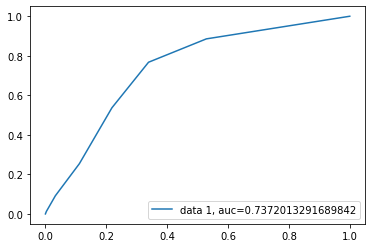

In [40]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

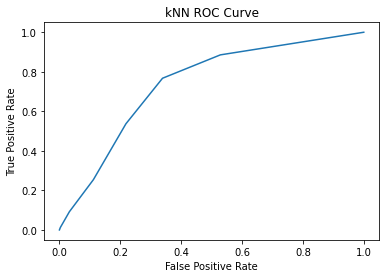

In [41]:
plt.plot(fpr, tpr, label='kNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('kNN ROC Curve')
plt.show